# NEOs dataset - Decision trees

In [33]:
# importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

### Loading and preparing the data

In [34]:
df_neos_decision = pd.read_csv('neos_classification.csv')
df_neos_decision.head()

,Unnamed: 0,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
1,3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
2,4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False
3,5,25.00,0.026580,0.059435,47477.649832,4.290521e+07,False
4,7,19.75,0.298233,0.666868,46972.486794,6.997593e+07,False


In [35]:
# Isolating features and target
X = df_neos_decision.drop(columns=['is_hazardous'])
y = df_neos_decision['is_hazardous']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the Decision tree model

In [36]:
decision_model = DecisionTreeClassifier(random_state=42)
decision_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Making predictions and evaluating the model

In [39]:
y_pred = decision_model.predict(X_test)

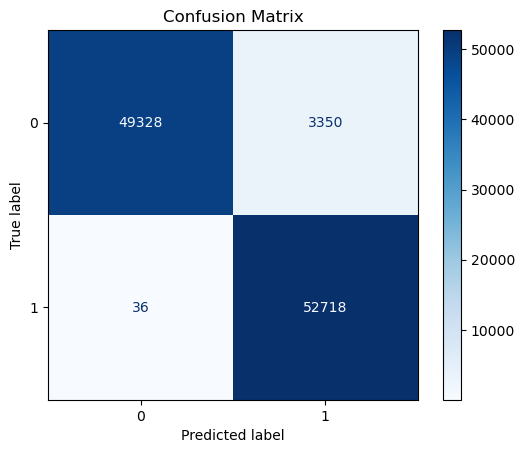

In [41]:
# Computing and displaying the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

disp_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp_matrix.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [43]:
# Evaluation metrics

precision = metrics.precision_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification
print(f'Precision: {precision:.2f}')

recall = metrics.recall_score(y_test, y_pred, average='binary')
print(f'Recall: {recall:.2f}')

f1_score = metrics.f1_score(y_test, y_pred, average='binary')
print(f'F1 Score: {f1_score:.2f}')

Precision: 0.94
Recall: 1.00
F1 Score: 0.97
